In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.ma as ma
import glob
from collections import namedtuple, OrderedDict
import netCDF4 as nc
import os
import scipy
import scipy.io as sio
from scipy import interpolate, signal
from scipy.interpolate import interp1d
from pyproj import Proj,transform
import sys
sys.path.append('/ocean/ssahu/CANYONS/wcvi/grid/')
from bathy_common import *
from matplotlib import path
from salishsea_tools import viz_tools
import xarray as xr
from salishsea_tools import nc_tools
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools
import gsw
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse
import matplotlib as mpl

import seaborn as sns
from windrose import plot_windrose
from windrose import WindroseAxes


from dateutil        import parser
from datetime import datetime

import numpy.ma as ma

sns.set_context('talk')
sns.set_style('darkgrid')

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht'][:32]
y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))


bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]



nc_file = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/Ariane_files/accurate_isopycnals_eddy_water_particles_two_months_more.nc')
nc_tools.show_variables(nc_file)

odict_keys(['init_x', 'init_y', 'init_z', 'init_t', 'init_age', 'init_transp', 'final_x', 'final_y', 'final_z', 'final_t', 'final_age', 'final_transp', 'traj_lon', 'traj_lat', 'traj_depth', 'traj_time', 'traj_temp', 'traj_salt', 'traj_dens'])


In [3]:


init_x = nc_file.variables['init_x']
init_z = nc_file.variables['init_z']
init_age = nc_file.variables['init_age']

traj_depth = nc_file.variables['traj_depth'][:]
traj_lon   = nc_file.variables['traj_lon'][:]
traj_lat   = nc_file.variables['traj_lat'][:]
traj_rho   = nc_file.variables['traj_dens'][:]
traj_tem   = nc_file.variables['traj_temp'][:]
traj_sal   = nc_file.variables['traj_salt'][:]
traj_time  = nc_file.variables['traj_time']


final_age = nc_file.variables['final_age']


# lon1=nc_file.variables['traj_lon'][:]
# lat1=nc_file.variables['traj_lat'][:]
# dep1=nc_file.variables['traj_depth'][:]
x1=nc_file.variables['init_x'][:]
y1=nc_file.variables['init_y'][:]
t1=nc_file.variables['traj_time'][:]

x_low = x1
y_low = y1

x2=nc_file.variables['final_x'][:]
y2=nc_file.variables['final_y'][:]


final_z = nc_file.variables['final_z'][:]

final_age_days = final_age[:]/(3600)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


In [4]:
x_final = []
y_final = []


for i in np.arange(x2.shape[0]):
    x_final = np.append(arr=x_final,values=x_wcvi_slice[np.int(np.rint(x2[i]))-1])
    y_final = np.append(arr=y_final,values=y_wcvi_slice[np.int(np.rint(y2[i]))-1])

In [5]:
def plot_particle_track(particle_ind):
    
    part = particle_ind
    
    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']


    lon = bathy['nav_lon'][...]
    lat = bathy['nav_lat'][...]



    file_model = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_T_20130429-20130508.nc')

    lon_small = file_model.variables['nav_lon'][1:,1:]
    lat_small = file_model.variables['nav_lat'][1:,1:]




#     cmap=plt.cm.get_cmap('nipy_spectral')
    cmap = plt.cm.get_cmap('gist_rainbow_r')
    cmap.set_bad('#8b7765')
    cmin = 0
    cmax = 300

    import matplotlib as mpl
    #     norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

    fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], np.arange(100,200,10))
    CS1 = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], level = [0,100,200,500,1000])
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=12)
    CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)


    # part = ind[0]
    # for part in ind[139]:

    for k in np.arange(0,np.int(final_age_days[part]),10):
        y, x = geo_tools.find_closest_model_point(traj_lon[k,part],traj_lat[k,part],\
                                      lon,lat,grid='NEMO',tols=\
                                      {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                       'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        track1 = ax.scatter(x_wcvi_slice[np.int(np.rint(x1[part]))-1], y_wcvi_slice[np.int(np.rint(y1[part]))-1], s=500, marker = '*', c = 'magenta', alpha=0.9, edgecolor= 'orangered')
        q = ax.scatter(x, y, c = np.multiply(-1,np.ma.array(traj_depth[k,part]).filled()), cmap = cmap, vmin = cmin, vmax= cmax, s=100, alpha=0.9)#, edgecolor= 'cyan')

        t = np.int(np.rint(120 - traj_time[k,part]*120))
        level = np.int(np.rint((np.abs(zlevels - (-traj_depth[k,part]))).argmin()))



        j, i = geo_tools.find_closest_model_point(traj_lon[k,part],traj_lat[k,part],\
                                                  lon_small,lat_small,grid='NEMO',tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                                   'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


    #     quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_rho_0[::arrow_step,::arrow_step], v_rho_0[::arrow_step,::arrow_step] , speeds[::arrow_step,::arrow_step], pivot='mid', cmap = cmap, width=0.005, minshaft= 0.5)
    #     quiver = ax.quiver(x, y, u_tzyx_loc, v_tzyx_loc , color = 'blue', cmap = cmap, pivot='tail', width=0.003, minshaft= 0.5)
    # #     legend = ax.legend(loc='best', fancybox=True, framealpha=0.25, fontsize =16)
    # ax.quiverkey(quiver, 610, 320,  0.1, r'0.1 m/sec', coordinates = 'data')

    ax.set_xlabel('x index', fontsize =16)
    ax.set_ylabel('y index', fontsize = 16)
    ax.tick_params(axis='both',labelsize =16)


    # ax.set_title('Particle track at depth \u2248 {d:.1f} m'.format(d = np.abs(traj_depth[0,part])), fontsize =16)
    ax.legend(loc = 'best')

    viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')

    ax.grid()

    cbar = fig.colorbar(q, ax=ax)
    cbar.set_label(label='Depth ($m$)', fontsize = 16)
    cbar.ax.tick_params(labelsize=16)
    fig.tight_layout()

    
def plot_combined_particle_track_one_month(particle_ind):
    
    
    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']


    lon = bathy['nav_lon'][...]
    lat = bathy['nav_lat'][...]



    file_model = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_T_20130429-20130508.nc')

    lon_small = file_model.variables['nav_lon'][1:,1:]
    lat_small = file_model.variables['nav_lat'][1:,1:]




#     cmap=plt.cm.get_cmap('nipy_spectral')
    cmap = plt.cm.get_cmap('gist_rainbow_r')
    cmap.set_bad('#8b7765')
    cmin = 0
    cmax = 300

    import matplotlib as mpl
    #     norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

    fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], np.arange(100,200,10))
    CS1 = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], level = [0,100,200,500,1000])
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=12)
    CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)


    # part = ind[0]
    # for part in ind[139]:
    
    for part in particle_ind:

        for k in np.arange(0,np.int(final_age_days[part]),10):
            y, x = geo_tools.find_closest_model_point(traj_lon[k,part],traj_lat[k,part],\
                                          lon,lat,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
            track1 = ax.scatter(x_wcvi_slice[np.int(np.rint(x1[part]))-1], y_wcvi_slice[np.int(np.rint(y1[part]))-1], s=500, marker = '*', c = 'magenta', alpha=0.9, edgecolor= 'orangered')
            q = ax.scatter(x, y, c = np.multiply(-1,np.ma.array(traj_depth[k,part]).filled()), cmap = cmap, vmin = cmin, vmax= cmax, s=10, alpha=0.9)#, edgecolor= 'k')

            t = np.int(np.rint(120 - traj_time[k,part]*120))
            level = np.int(np.rint((np.abs(zlevels - (-traj_depth[k,part]))).argmin()))



#             j, i = geo_tools.find_closest_model_point(traj_lon[k,part],traj_lat[k,part],\
#                                                       lon_small,lat_small,grid='NEMO',tols=\
#                                                       {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
#                                                        'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


    #     quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_rho_0[::arrow_step,::arrow_step], v_rho_0[::arrow_step,::arrow_step] , speeds[::arrow_step,::arrow_step], pivot='mid', cmap = cmap, width=0.005, minshaft= 0.5)
    #     quiver = ax.quiver(x, y, u_tzyx_loc, v_tzyx_loc , color = 'blue', cmap = cmap, pivot='tail', width=0.003, minshaft= 0.5)
    # #     legend = ax.legend(loc='best', fancybox=True, framealpha=0.25, fontsize =16)
    # ax.quiverkey(quiver, 610, 320,  0.1, r'0.1 m/sec', coordinates = 'data')

    ax.set_xlabel('x index', fontsize =16)
    ax.set_ylabel('y index', fontsize = 16)
    ax.tick_params(axis='both',labelsize =16)


    # ax.set_title('Particle track at depth \u2248 {d:.1f} m'.format(d = np.abs(traj_depth[0,part])), fontsize =16)
    ax.legend(loc = 'best')

    viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')

    ax.grid()

    cbar = fig.colorbar(q, ax=ax)
    cbar.set_label(label='Depth ($m$)', fontsize = 16)
    cbar.ax.tick_params(labelsize=16)
    fig.tight_layout()
    
    
def plot_particle_track_one_month_from_source(particle_ind):
    
    part = particle_ind
    
    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']


    lon = bathy['nav_lon'][...]
    lat = bathy['nav_lat'][...]



    file_model = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_T_20130429-20130508.nc')

    lon_small = file_model.variables['nav_lon'][1:,1:]
    lat_small = file_model.variables['nav_lat'][1:,1:]




#     cmap=plt.cm.get_cmap('nipy_spectral')
    cmap = plt.cm.get_cmap('gist_rainbow_r')
    cmap.set_bad('#8b7765')
    cmin = 0
    cmax = 300

    import matplotlib as mpl
    #     norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

    fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], np.arange(100,200,10))
    CS1 = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], level = [0,100,200,500,1000])
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=12)
    CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)


    # part = ind[0]
    # for part in ind[139]:

    for k in np.arange(2136,np.int(final_age_days[part]),10):
        y, x = geo_tools.find_closest_model_point(traj_lon[k,part],traj_lat[k,part],\
                                      lon,lat,grid='NEMO',tols=\
                                      {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                       'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        track1 = ax.scatter(x_wcvi_slice[np.int(np.rint(x1[part]))-1], y_wcvi_slice[np.int(np.rint(y1[part]))-1], s=500, marker = '*', c = 'magenta', alpha=0.9, edgecolor= 'orangered')
        q = ax.scatter(x, y, c = np.multiply(-1,np.ma.array(traj_depth[k,part]).filled()), cmap = cmap, vmin = cmin, vmax= cmax, s=100, alpha=0.9)#, edgecolor= 'cyan')

        t = np.int(np.rint(120 - traj_time[k,part]*120))
        level = np.int(np.rint((np.abs(zlevels - (-traj_depth[k,part]))).argmin()))



        j, i = geo_tools.find_closest_model_point(traj_lon[k,part],traj_lat[k,part],\
                                                  lon_small,lat_small,grid='NEMO',tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                                   'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


    #     quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_rho_0[::arrow_step,::arrow_step], v_rho_0[::arrow_step,::arrow_step] , speeds[::arrow_step,::arrow_step], pivot='mid', cmap = cmap, width=0.005, minshaft= 0.5)
    #     quiver = ax.quiver(x, y, u_tzyx_loc, v_tzyx_loc , color = 'blue', cmap = cmap, pivot='tail', width=0.003, minshaft= 0.5)
    # #     legend = ax.legend(loc='best', fancybox=True, framealpha=0.25, fontsize =16)
    # ax.quiverkey(quiver, 610, 320,  0.1, r'0.1 m/sec', coordinates = 'data')

    ax.set_xlabel('x index', fontsize =16)
    ax.set_ylabel('y index', fontsize = 16)
    ax.tick_params(axis='both',labelsize =16)


    # ax.set_title('Particle track at depth \u2248 {d:.1f} m'.format(d = np.abs(traj_depth[0,part])), fontsize =16)
    ax.legend(loc = 'best')

    viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')

    ax.grid()

    cbar = fig.colorbar(q, ax=ax)
    cbar.set_label(label='Depth ($m$)', fontsize = 16)
    cbar.ax.tick_params(labelsize=16)
    fig.tight_layout()
    
    
    
    
def plot_pie_diagram(off_percentage, south_percentage, cuc_percentage, juan_percentage, north_percentage):

    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']


    lon = bathy['nav_lon'][...]
    lat = bathy['nav_lat'][...]




    cmap=plt.cm.get_cmap('nipy_spectral')
    #     cmap = plt.cm.get_cmap('gist_rainbow')
    cmap.set_bad('#8b7765')
    cmin = 0
    cmax = 300

    import matplotlib as mpl
    #     norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

    fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], np.arange(100,200,10))
    CS1 = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], level = [0,100,200,500,1000])
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=12)
    CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)



    ax.set_xlabel('x index', fontsize =16)
    ax.set_ylabel('y index', fontsize = 16)
    ax.tick_params(axis='both',labelsize =16)
    for k in np.arange(x1.shape[0]):
        ax.scatter(x_wcvi_slice[np.int(x1[k]-1)],y_wcvi_slice[np.int(y1[k]-1)], marker = '*', c = 'red', s = 10, linewidths=3)
    

    # ax.set_title('Particle track at depth \u2248 {d:.1f} m'.format(d = np.abs(traj_depth[0,part])), fontsize =16)
    ax.legend(loc = 'best')

    viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')

    x = [520,575]
    y = [320,200]
    ax.plot(x, y , 'bo-')


    ax.hlines(y = 200, xmin = 575, xmax=645, color = 'b')
    ax.hlines(y = 320, xmin = 520, xmax=590, color = 'b')
    ax.grid()

    axins = inset_axes(ax, width="50%", height="75%",
                       bbox_to_anchor=(.085, .15, .5, .5),
                       bbox_transform=ax.transAxes, loc=3)
    axins.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

    axins.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)


    labels = 'Offshore', 'From South', 'CUC','Strait outflow', 'From North', 'Local water'
    sizes = [off_percentage, south_percentage, cuc_percentage, juan_percentage, north_percentage, \
             100- (off_percentage + south_percentage + cuc_percentage + juan_percentage + north_percentage)]
    explode = (0, 0.1, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


    size = 0.35
    vals = np.array([[9.5, 0], [10.2, 0], [12.3, 0], [25.4, 51.7-25.4]])

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(4)*4)
    inner_colors = cmap(np.arange(5)*4)#cmap(np.array([1, 4, 7, 10, 13, 25]))

    axins.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    axins.axis('equal') 
    ax.vlines(x = 648, ymin = 255, ymax = 271, color = 'blue')

    fig.tight_layout()
    
    
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)


def find_index(k):
    
    indice = np.zeros(final_age.shape[0])
    
    for m in np.arange(traj_lon.shape[1]):

        y, x = geo_tools.find_closest_model_point(traj_lon[k,m],traj_lat[k,m],\
                                      lon,lat,grid='NEMO',tols=\
                                      {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                       'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        y1,x1 = geo_tools.find_closest_model_point(traj_lon[k-500,m],traj_lat[k-500,m],\
                                      lon,lat,grid='NEMO',tols=\
                                      {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                       'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

        bbox = mpl.transforms.Bbox(points=[(x,y), (x1,y1)]) 

        if (mpl.path.Path(vertices=vert).intersects_bbox(bbox, filled=True)) == True:
            
            indice[m] = m

        else:
            continue

    indexes = np.array(np.nonzero(indice))
    
    return indexes[0]


def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs)
    return ax


def mixing(T, S, inds):
    """
    Compute the water mass mixing percentage using Mamayev's (1975) mixing
    triangle.

    Parameters
    ----------
    T : Conservative Temperature
    S : Absolute Salinity
    inds :  2x3 array with thermohaline indices
            [T1 T2 T3
            S1 S2 S3]

    Returns
    -------
    m1, m2, m3 : Water mass percentage for masses 1, 2 e 3.

    """

    a = np.r_[inds, np.ones((1, 3))]
    b = np.c_[T.ravel(), S.ravel(), np.ones(T.shape).ravel()].T
    m = np.linalg.solve(a, b)
    m1 = m[0].reshape(T.shape)
    m2 = m[1].reshape(T.shape)
    m3 = m[2].reshape(T.shape)

    # Mask values outside mixing triangle.
    m1 = ma.masked_outside(ma.masked_invalid(m1), 0, 1)
    m2 = ma.masked_outside(ma.masked_invalid(m2), 0, 1)
    m3 = ma.masked_outside(ma.masked_invalid(m3), 0, 1)

    m1 = 100 * m1
    m2 = 100 * m2
    m3 = 100 * m3
    return m1, m2, m3


In [6]:
x = [510,575]
y = [320,200]


coefficients = np.polyfit(x, y, 1)

x_final_off = np.arange(x[0],x[1])
polynomial = np.poly1d(coefficients)
y_final_off = np.rint(polynomial(x_final_off))

p1= (x[0],y[0])
p1 = np.asarray(p1)
p2 = (x[1], y[1])
p2 = np.asarray(p2)



d = np.empty_like(x_final)

off_ind = []


for r in np.arange(x_final.shape[0]):

    p3 = (x_final[r], y_final[r])
    p3 = np.asarray(p3)
    d[r] =np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
    
    if ((d[r] < 0) & (x_final[r] < 575)):
        off_ind = np.append(arr=off_ind, values=np.int(r))

In [7]:
num_north = np.round(a=final_age[(x_final < 580) & (y_final > 300)].shape[0]/final_z.shape[0], decimals=3)

north_percent = 100*num_north

print(north_percent)

num_cuc = np.round(a=np.where(final_z[((x_final < 630) & (y_final < 200)) & \
                                      ((x_final > 580) & (y_final < 200))]>26.3)[0].shape[0]/final_z.shape[0], decimals = 3)

cuc_percent = 100*num_cuc

print(cuc_percent)

num_south = np.round(a=np.where(final_z[((x_final < 630) & (y_final < 200)) & \
                                      ((x_final > 580) & (y_final < 200))]<=26.3)[0].shape[0]/final_z.shape[0], decimals = 3)

south_percent = 100*num_south

print(south_percent)

### Bigger box
x = [510,575]
y = [320,200]


coefficients = np.polyfit(x, y, 1)

x_final_off = np.arange(x[0],x[1])
polynomial = np.poly1d(coefficients)
y_final_off = np.rint(polynomial(x_final_off))

num_off = off_ind.shape[0]/final_z.shape[0]
off_percent = np.round(a=100*num_off, decimals=1)

print(off_percent)

num_juan = np.round(a=np.where((x_final > 648))[0].shape[0]/final_z.shape[0], decimals=3)

juan_percent = num_juan*100

print(juan_percent)

5.2
42.0
22.5
21.4
2.4


In [8]:
cuc_percent_low = cuc_percent
juan_percent_low = juan_percent
north_percent_low = north_percent
south_percent_low = south_percent
off_percent_low = off_percent



In [9]:
traj_tem_last   = np.empty_like(final_age_days)
traj_sal_last   = np.empty_like(final_age_days)
traj_rho_last   = np.empty_like(final_age_days)
traj_depth_last = np.empty_like(final_age_days)


traj_tem_init   = np.empty_like(final_age_days)
traj_sal_init   = np.empty_like(final_age_days)
traj_rho_init   = np.empty_like(final_age_days)
traj_depth_init = np.empty_like(final_age_days)

for r in np.arange(traj_tem_last.shape[0]):
    traj_tem_last[r]  =  traj_tem[np.int(final_age_days[r]),r]
    traj_sal_last[r]  =  traj_sal[np.int(final_age_days[r]),r]
    traj_rho_last[r]  =  traj_rho[np.int(final_age_days[r]),r]
    traj_depth_last[r] = traj_depth[np.int(final_age_days[r]),r]
    
    traj_tem_init[r]  =  traj_tem[0,r]
    traj_sal_init[r]  =  traj_sal[0,r]
    traj_rho_init[r]  =  traj_rho[0,r]    
    traj_depth_init[r]=  traj_depth[0,r] 
    

In [10]:
max_life_ind = np.array(np.where(final_age_days == np.max(final_age_days))[0])

off_ind   = off_ind
north_ind = np.where([(x_final < 580) & (y_final > 300)])[1]
south_ind = []
cuc_ind   = []


ind_all_south  = np.where(((x_final < 630) & (y_final < 200)) & \
                                      ((x_final > 580) & (y_final < 200)))[0]

for k in ind_all_south:
    if final_z[k] <= 26.3:
        south_ind = np.append(arr=south_ind, values= k)
        
    if final_z[k] > 26.3:
        cuc_ind = np.append(arr=cuc_ind, values=k)
        

juan_ind =  np.where((x_final > 648))[0]

non_local_ind = np.concatenate((off_ind, north_ind, south_ind, cuc_ind, juan_ind))

ind_local = np.setdiff1d(max_life_ind, np.unique(non_local_ind, return_index= False).astype(int), assume_unique=True)

# off_ind/

# ind_local = np.setdiff1d(max_life_ind, off_ind, assume_unique= True)

x_local_low_actual = x2[ind_local]
y_local_low_actual = y2[ind_local]

depth_local_low_actual = -traj_depth_last[ind_local]


In [11]:
count_ind = np.concatenate((ind_local, np.unique(non_local_ind, return_index= False).astype(int)))

count_ind.shape[0]/final_z.shape[0]

0.989501312335958

In [12]:

traj_tem_final_cuc = traj_tem_last[cuc_ind.astype(int)]
traj_sal_final_cuc = traj_sal_last[cuc_ind.astype(int)]
traj_rho_final_cuc = traj_rho_last[cuc_ind.astype(int)]
traj_depth_final_cuc = traj_depth_last[cuc_ind.astype(int)]
traj_days_final_cuc = final_age_days[cuc_ind.astype(int)]/24



traj_tem_final_north = traj_tem_last[north_ind.astype(int)]
traj_sal_final_north = traj_sal_last[north_ind.astype(int)]
traj_rho_final_north = traj_rho_last[north_ind.astype(int)]
traj_depth_final_north = traj_depth_last[north_ind.astype(int)]
traj_days_final_north = final_age_days[north_ind.astype(int)]/24



traj_tem_final_south   = traj_tem_last[south_ind.astype(int)]
traj_sal_final_south   = traj_sal_last[south_ind.astype(int)]
traj_rho_final_south   = traj_rho_last[south_ind.astype(int)]
traj_depth_final_south = traj_depth_last[south_ind.astype(int)]
traj_days_final_south  = final_age_days[south_ind.astype(int)]/24


traj_tem_final_juan = traj_tem_last[juan_ind.astype(int)]
traj_sal_final_juan = traj_sal_last[juan_ind.astype(int)]
traj_rho_final_juan = traj_rho_last[juan_ind.astype(int)]
traj_depth_final_juan = traj_depth_last[juan_ind.astype(int)]
traj_days_final_juan = final_age_days[juan_ind.astype(int)]/24


traj_tem_final_local = traj_tem_last[ind_local.astype(int)]
traj_sal_final_local = traj_sal_last[ind_local.astype(int)]
traj_rho_final_local = traj_rho_last[ind_local.astype(int)]
traj_depth_final_local = traj_depth_last[ind_local.astype(int)]
traj_days_final_local = final_age_days[ind_local.astype(int)]/24




x = [510,575]
y = [320,200]

coefficients = np.polyfit(x, y, 1)
x_final_off = np.arange(x[0],x[1])
polynomial = np.poly1d(coefficients)
y_final_off = np.rint(polynomial(x_final_off))

traj_tem_final_off = []
traj_sal_final_off = []
traj_rho_final_off = []
traj_depth_final_off = []
traj_days_final_off = []

for l in np.arange(off_ind.shape[0]):

    traj_depth_final_off = np.append(arr=traj_depth_final_off, values=traj_depth_last[np.int(off_ind[l])])
    traj_days_final_off = np.append(arr=traj_days_final_off, values=final_age_days[np.int(off_ind[l])]/24)
    traj_rho_final_off   = np.append(arr=traj_rho_final_off, values=traj_rho_last[np.int(off_ind[l])])
    traj_tem_final_off   = np.append(arr=traj_tem_final_off, values=traj_tem_last[np.int(off_ind[l])])
    traj_sal_final_off   = np.append(arr=traj_sal_final_off, values=traj_sal_last[np.int(off_ind[l])])


In [13]:
pressure_loc_cuc = np.empty_like(traj_depth_final_cuc)
SA_loc_cuc       = np.empty_like(traj_depth_final_cuc)
CT_loc_cuc       = np.empty_like(traj_depth_final_cuc)
spic_loc_cuc     = np.empty_like(traj_depth_final_cuc)



for i in np.arange(traj_depth_final_cuc.shape[0]):
    
    pressure_loc_cuc[i] = gsw.p_from_z(traj_depth_final_cuc[i],np.mean(traj_lat))
    
    SA_loc_cuc[i] = gsw.SA_from_SP(traj_sal_final_cuc[i], pressure_loc_cuc[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_cuc[i] = gsw.CT_from_pt(traj_sal_final_cuc[i], traj_tem_final_cuc[i])
    
    spic_loc_cuc[i] = gsw.spiciness0(SA_loc_cuc[i], CT_loc_cuc[i])
    
pressure_loc_off = np.empty_like(traj_depth_final_off)
SA_loc_off       = np.empty_like(traj_depth_final_off)
CT_loc_off       = np.empty_like(traj_depth_final_off)
spic_loc_off     = np.empty_like(traj_depth_final_off)



for i in np.arange(traj_depth_final_off.shape[0]):
    
    pressure_loc_off[i] = gsw.p_from_z(traj_depth_final_off[i],np.mean(traj_lat))
    
    SA_loc_off[i] = gsw.SA_from_SP(traj_sal_final_off[i], pressure_loc_off[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_off[i] = gsw.CT_from_pt(traj_sal_final_off[i], traj_tem_final_off[i])
    
    spic_loc_off[i] = gsw.spiciness0(SA_loc_off[i], CT_loc_off[i])
    
pressure_loc_south = np.empty_like(traj_depth_final_south)
SA_loc_south       = np.empty_like(traj_depth_final_south)
CT_loc_south       = np.empty_like(traj_depth_final_south)
spic_loc_south     = np.empty_like(traj_depth_final_south)



for i in np.arange(traj_depth_final_south.shape[0]):
    
    pressure_loc_south[i] = gsw.p_from_z(traj_depth_final_south[i],np.mean(traj_lat))
    
    SA_loc_south[i] = gsw.SA_from_SP(traj_sal_final_south[i], pressure_loc_south[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_south[i] = gsw.CT_from_pt(traj_sal_final_south[i], traj_tem_final_south[i])
    
    spic_loc_south[i] = gsw.spiciness0(SA_loc_south[i], CT_loc_south[i])
    
pressure_loc_north= np.empty_like(traj_depth_final_north)
SA_loc_north       = np.empty_like(traj_depth_final_north)
CT_loc_north       = np.empty_like(traj_depth_final_north)
spic_loc_north     = np.empty_like(traj_depth_final_north)



for i in np.arange(traj_depth_final_north.shape[0]):
    
    pressure_loc_north[i] = gsw.p_from_z(traj_depth_final_north[i],np.mean(traj_lat))
    
    SA_loc_north[i] = gsw.SA_from_SP(traj_sal_final_north[i], pressure_loc_north[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_north[i] = gsw.CT_from_pt(traj_sal_final_north[i], traj_tem_final_north[i])
    
    spic_loc_north[i] = gsw.spiciness0(SA_loc_north[i], CT_loc_north[i])
    

pressure_loc_juan= np.empty_like(traj_depth_final_juan)
SA_loc_juan       = np.empty_like(traj_depth_final_juan)
CT_loc_juan       = np.empty_like(traj_depth_final_juan)
spic_loc_juan     = np.empty_like(traj_depth_final_juan)



for i in np.arange(traj_depth_final_juan.shape[0]):
    
    pressure_loc_juan[i] = gsw.p_from_z(traj_depth_final_juan[i],np.mean(traj_lat))
    
    SA_loc_juan[i] = gsw.SA_from_SP(traj_sal_final_juan[i], pressure_loc_juan[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_juan[i] = gsw.CT_from_pt(traj_sal_final_juan[i], traj_tem_final_juan[i])
    
    spic_loc_juan[i] = gsw.spiciness0(SA_loc_juan[i], CT_loc_juan[i])
    

In [14]:

pressure_loc_init = np.empty_like(traj_tem_init)
SA_loc_init       = np.empty_like(traj_depth_init)
CT_loc_init       = np.empty_like(traj_depth_init)
spic_loc_init     = np.empty_like(traj_depth_init)



for i in np.arange(traj_depth_init.shape[0]):
    
    pressure_loc_init[i] = gsw.p_from_z(traj_depth_init[i],np.mean(traj_lat))
    
    SA_loc_init[i] = gsw.SA_from_SP(traj_sal_init[i], pressure_loc_init[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_init[i] = gsw.CT_from_pt(traj_sal_init[i], traj_tem_init[i])
    
    spic_loc_init[i] = gsw.spiciness0(SA_loc_init[i], CT_loc_init[i])
    
    
pressure_loc_local = np.empty_like(traj_depth_final_local)
SA_loc_local       = np.empty_like(traj_depth_final_local)
CT_loc_local       = np.empty_like(traj_depth_final_local)
spic_loc_local     = np.empty_like(traj_depth_final_local)



for i in np.arange(traj_depth_final_local.shape[0]):
    
    pressure_loc_local[i] = gsw.p_from_z(traj_depth_final_local[i],np.mean(traj_lat))
    
    SA_loc_local[i] = gsw.SA_from_SP(traj_sal_final_local[i], pressure_loc_local[i], np.mean(traj_lon), np.mean(traj_lat))
    
    CT_loc_local[i] = gsw.CT_from_pt(traj_sal_final_local[i], traj_tem_final_local[i])
    
    spic_loc_local[i] = gsw.spiciness0(SA_loc_local[i], CT_loc_local[i])    
    

(5, 12)

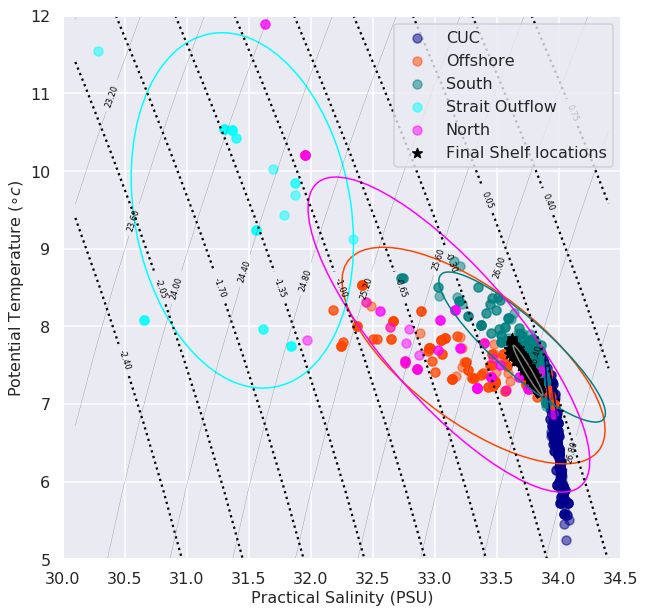

In [23]:
# colors = cmo.cm.phase(np.linspace(0, 1, 200))


# traj_sal_domain = traj_sal[traj_sal != 1.0100000202412861e+20]
# traj_tem_domain = traj_tem[traj_sal != 1.0100000202412861e+20]

# smin = np.nanmin(traj_sal_last)  - (0.01 * np.nanmin(traj_sal_last))
smin = 30
smax = np.nanmax(traj_sal_last)  + (0.01 * np.nanmax(traj_sal_last))
# tmin = np.nanmin(traj_tem_last) - (0.1 * np.nanmax(traj_tem_last))
tmin = 4
tmax = 12
# tmax = np.nanmax(traj_tem_last) + (0.1 * np.nanmax(traj_tem_last))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(traj_lon), np.mean(traj_lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000;
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = ax.contour(si,ti,dens_1, np.arange(22.4,27,0.4), linestyles='dashed', linewidths = 0.2,colors='k')
CS1 = ax.contour(si,ti,spic_1,np.arange(-2.4,1,0.35), linestyles='dotted', colors='k')
plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level



ax.scatter(traj_sal_final_cuc, traj_tem_final_cuc, s=80, alpha=0.5, c = 'darkblue', label = 'CUC')
sal_mean_cuc = np.mean(traj_sal_final_cuc)
tem_mean_cuc = np.mean(traj_tem_final_cuc)
cov_cuc = np.cov(traj_sal_final_cuc, traj_tem_final_cuc)
cuc_ell = get_cov_ellipse(cov_cuc, (sal_mean_cuc, tem_mean_cuc), 2,
                    ec='darkblue', fc = None)
cuc_ell.set_facecolor('none')
ax.add_artist(cuc_ell)




ax.scatter(traj_sal_final_off, traj_tem_final_off, s=80, alpha=0.5, c = 'orangered', label = 'Offshore')
sal_mean_off = np.mean(traj_sal_final_off)
tem_mean_off = np.mean(traj_tem_final_off)
cov_off = np.cov(traj_sal_final_off, traj_tem_final_off)
off_ell = get_cov_ellipse(cov_off, (sal_mean_off, tem_mean_off), 2,
                    ec='orangered', fc = None)
off_ell.set_facecolor('none')
ax.add_artist(off_ell)


traj_tem_final_north = traj_tem_final_north[traj_sal_final_north > 30]
traj_sal_final_north = traj_sal_final_north[traj_sal_final_north > 30]

ax.scatter(traj_sal_final_south, traj_tem_final_south, s=80, alpha=0.5, c= 'Teal', label = 'South')
sal_mean_south = np.mean(traj_sal_final_south)
tem_mean_south = np.mean(traj_tem_final_south)
cov_south = np.cov(traj_sal_final_south, traj_tem_final_south)
south_ell = get_cov_ellipse(cov_south, (sal_mean_south, tem_mean_south), 3,
                    ec='Teal', fc = None)
south_ell.set_facecolor('none')
ax.add_artist(south_ell)




# traj_tem_final_juan = traj_tem_final_juan[traj_sal_final_juan < 32.8]
# traj_sal_final_juan = traj_sal_final_juan[traj_sal_final_juan < 32.8]

ax.scatter(traj_sal_final_juan, traj_tem_final_juan, s=80, alpha=0.5, c = 'cyan', label = 'Strait Outflow')
sal_mean_juan = np.mean(traj_sal_final_juan)
tem_mean_juan = np.mean(traj_tem_final_juan)
cov_juan = np.cov(traj_sal_final_juan, traj_tem_final_juan)
juan_ell = get_cov_ellipse(cov_juan, (sal_mean_juan, tem_mean_juan), 2,
                    fc = None, ec='cyan')
juan_ell.set_facecolor('none')
ax.add_artist(juan_ell)




ax.scatter(traj_sal_final_north, traj_tem_final_north, s=80, alpha=0.5, c = 'Magenta', label = 'North')
sal_mean_north = np.mean(traj_sal_final_north)
tem_mean_north = np.mean(traj_tem_final_north)
cov_north = np.cov(traj_sal_final_north, traj_tem_final_north)
north_ell = get_cov_ellipse(cov_north, (sal_mean_north, tem_mean_north), 2,
                    ec='Magenta', fc = None)
north_ell.set_facecolor('none')
ax.add_artist(north_ell)

# traj_tem_final_local = traj_tem_final_local[traj_sal_final_local > 30]
# traj_sal_final_local = traj_sal_final_local[traj_sal_final_local > 30]

# ax.scatter(traj_sal_final_local, traj_tem_final_local, s=80, alpha=0.5, c = 'Gold', label = 'Local Water')
# sal_mean_local = np.mean(traj_sal_final_local)
# tem_mean_local = np.mean(traj_tem_final_local)
# cov_local = np.cov(traj_sal_final_local, traj_tem_final_local)
# local_ell = get_cov_ellipse(cov_local, (sal_mean_local, tem_mean_local), 2,
#                     ec='Gold', fc = None)
# local_ell.set_facecolor('none')
# ax.add_artist(local_ell)


traj_tem_init = traj_tem_init[traj_sal_init > 30]
traj_sal_init = traj_sal_init[traj_sal_init > 30]

ax.scatter(traj_sal_init, traj_tem_init, s=100, marker='*', c = 'k', label = "Final Shelf locations")#'chartreuse')
sal_mean_init = np.mean(traj_sal_init)
tem_mean_init = np.mean(traj_tem_init)
cov_init = np.cov(traj_sal_init, traj_tem_init)
init_ell = get_cov_ellipse(cov_init, (sal_mean_init, tem_mean_init), 2,
                    ec='gray', fc = None)
init_ell.set_facecolor('none')
ax.add_artist(init_ell)


ax.legend(loc = 'best', fontsize = 16)


 
ax.set_xlabel('Practical Salinity (PSU)', fontsize = 16)
ax.set_ylabel('Potential Temperature ($\circ c$)', fontsize = 16)
ax.tick_params(axis='both',labelsize =16)
ax.set_xlim(30,34.5)
ax.set_ylim(5,12)


# legend = ax.legend(loc='upper right', fancybox=True, framealpha=0.25)

In [13]:
survey_mat_file_A = '/data/ssahu/Falkor_2013/mvp/surveyA.mat'
survey_mat_file_B = '/data/ssahu/Falkor_2013/mvp/surveyB.mat'
survey_mat_file_D = '/data/ssahu/Falkor_2013/mvp/surveyD.mat'
survey_mat_file_E = '/data/ssahu/Falkor_2013/mvp/surveyE.mat'
survey_mat_file_G = '/data/ssahu/Falkor_2013/mvp/surveyG.mat'


all_surveys = [survey_mat_file_A, survey_mat_file_B, survey_mat_file_D, \
              survey_mat_file_E, survey_mat_file_G]

In [14]:
mat = scipy.io.loadmat(survey_mat_file_A)

In [15]:
mat.keys()

dict_keys(['__globals__', 'salinity', 'pressure', 'cast_number', 'mtime', '__header__', 'latitude', 'longitude', 'depths', 'analog', 'pden', 'bottom', 'temp', 'cond', 'density', 'matlabtime', '__version__'])

In [16]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht'][:32]
y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)


bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

lon = bathy['nav_lon'][180:350,480:650]
lat = bathy['nav_lat'][180:350,480:650]

In [17]:
NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_2013_T_S_Spice_larger_offshore_rho_correct.nc')


sal = NEP.variables['vosaline']
temp = NEP.variables['votemper']
spic = NEP.variables['spiciness']
rho = NEP.variables['density']


sal_mean_august  = np.mean(sal[88:119,...], axis=0)
temp_mean_august = np.mean(temp[88:119,...], axis=0)
spic_mean_august = np.mean(spic[88:119,...], axis=0)
rho_mean_august  = np.mean(rho[88:119,...], axis=0)






In [18]:
for file in all_surveys:


    mat = scipy.io.loadmat(file)

    depths_survey = mat['depths'][:,0]
    lat_survey = mat['latitude'][:,0]
    lon_survey = mat['longitude'][:,0] - 100
    # den_survey = mat['density'][:]
    pden_survey = mat['pden'][:]
    temp_survey = mat['temp'][:]
    sal_survey = mat['salinity'][:]
    mtime = mat['mtime'][:,0]

    pressure_survey = np.empty_like(temp_survey)
    SA_survey = np.empty_like(temp_survey)
    CT_survey = np.empty_like(temp_survey)
    spic_survey = np.empty_like(temp_survey)
    rho_survey = np.empty_like(temp_survey)



    for j in np.arange(depths_survey.shape[0]):

        for i in np.arange(lat_survey.shape[0]):

            pressure_survey[j,i] = gsw.p_from_z(-depths_survey[j],lat_survey[i])

            SA_survey[j,i] = gsw.SA_from_SP(sal_survey[j,i], pressure_survey[j,i], lon_survey[i], lat_survey[i])

            CT_survey[j,i] = gsw.CT_from_pt(sal_survey[j,i], temp_survey[j,i])

            spic_survey[j,i] = gsw.spiciness0(SA_survey[j,i], CT_survey[j,i])

            rho_survey[j,i] = gsw.density.rho(SA_survey[j,i], CT_survey[j,i], 0)

            #Values indicate that pden is the true representative of the potential density calculated by rho_survey here


    y = np.empty_like(lat_survey)
    x = np.empty_like(y)


    for i in np.arange(lat_survey.shape[0]):
        y[i], x[i] = geo_tools.find_closest_model_point(
                   lon_survey[i],lat_survey[i],lon,lat,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})


    model_tem_mvp_loc = np.empty((zlevels.shape[0],y.shape[0]))
    model_sal_mvp_loc = np.empty_like(model_tem_mvp_loc)

    for i in np.arange(y.shape[0]):

        model_tem_mvp_loc[:,i] = temp_mean_august[:,y[i].astype(int),x[i].astype(int)]
        model_sal_mvp_loc[:,i] = sal_mean_august[:,y[i].astype(int),x[i].astype(int)]

    ## Now let us bring the MVP data to the model grid points (vertical model depth points)

    mvp_tem_loc = np.empty_like(model_tem_mvp_loc)
    mvp_sal_loc = np.empty_like(model_tem_mvp_loc)

    for k in np.arange(temp_survey.shape[1]):

        f_tem_mvp = interp1d(depths_survey[:], temp_survey[:,k], fill_value="extrapolate")

        tem_loc = f_tem_mvp(np.array(zlevels))

        mvp_tem_loc[:,k] = tem_loc

        f_sal_mvp = interp1d(depths_survey[:], sal_survey[:,k], fill_value="extrapolate")

        sal_loc = f_sal_mvp(np.array(zlevels))

        mvp_sal_loc[:,k] = sal_loc

        depth_mvp = np.empty_like(mvp_sal_loc)

        for p in np.arange(depth_mvp.shape[0]):
            depth_mvp[p,:] = zlevels[p]
            
            
    mvp_tem_loc       = mvp_tem_loc[np.nonzero(model_tem_mvp_loc)]
    model_tem_mvp_loc = model_tem_mvp_loc[np.nonzero(model_tem_mvp_loc)]

    depth_mvp = depth_mvp[np.nonzero(model_sal_mvp_loc)]

    mvp_sal_loc       = mvp_sal_loc[np.nonzero(model_sal_mvp_loc)]
    model_sal_mvp_loc = model_sal_mvp_loc[np.nonzero(model_sal_mvp_loc)]


    if file == survey_mat_file_A:

        model_tem_A = model_tem_mvp_loc
        model_sal_A = model_sal_mvp_loc

        mvp_tem_A   = mvp_tem_loc
        mvp_sal_A   = mvp_sal_loc

        depth_A     = depth_mvp


    if file == survey_mat_file_B:

        model_tem_B = model_tem_mvp_loc
        model_sal_B = model_sal_mvp_loc

        mvp_tem_B   = mvp_tem_loc
        mvp_sal_B   = mvp_sal_loc

        depth_B     = depth_mvp
        
        
    if file == survey_mat_file_D:

        model_tem_D = model_tem_mvp_loc
        model_sal_D = model_sal_mvp_loc

        mvp_tem_D   = mvp_tem_loc
        mvp_sal_D   = mvp_sal_loc

        depth_D     = depth_mvp
        
        mvp_sal_D_actual   = mvp_sal_D[np.where(model_sal_D - mvp_sal_D < 3)]
        model_sal_D_actual = model_sal_D[np.where(model_sal_D - mvp_sal_D < 3)]

        mvp_tem_D_actual   = mvp_tem_D[np.where(model_sal_D - mvp_sal_D < 3)]
        model_tem_D_actual = model_tem_D[np.where(model_sal_D - mvp_sal_D < 3)]

        depth_D_actual = depth_D[np.where(model_sal_D - mvp_sal_D < 3)]
        
        model_tem_D = model_tem_D_actual
        model_sal_D = model_sal_D_actual

        mvp_tem_D   = mvp_tem_D_actual
        mvp_sal_D   = mvp_sal_D_actual

        depth_D     = depth_D_actual


        
    
    if file == survey_mat_file_E:

        model_tem_E = model_tem_mvp_loc
        model_sal_E = model_sal_mvp_loc

        mvp_tem_E   = mvp_tem_loc
        mvp_sal_E   = mvp_sal_loc

        depth_E     = depth_mvp
        
    if file == survey_mat_file_G:

        model_tem_G = model_tem_mvp_loc
        model_sal_G = model_sal_mvp_loc

        mvp_tem_G   = mvp_tem_loc
        mvp_sal_G   = mvp_sal_loc

        depth_G     = depth_mvp   
            
        

#         return np.ndarray.flatten(model_tem_mvp_loc), np.ndarray.flatten(model_sal_mvp_loc), \
#     np.ndarray.flatten(mvp_tem_loc), np.ndarray.flatten(mvp_sal_loc), np.ndarray.flatten(depth_mvp)
    



/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:124: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:125: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:127: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:128: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:130: RuntimeWarning: invalid value encountered in less


(30, 34.399999999999999)

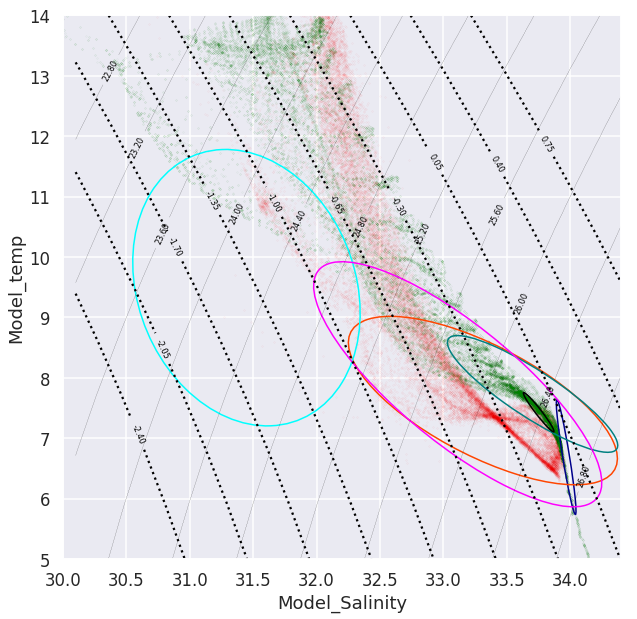

In [30]:
df =pd.DataFrame()
# df['Observed_temp'] = np.ndarray.flatten(mvp_tem_D_actual)
# df['Model_temp'] = np.ndarray.flatten(model_tem_D_actual)
# df['Observed_Salinity'] = np.ndarray.flatten(mvp_sal_D_actual)
# df['Model_Salinity'] = np.ndarray.flatten(model_sal_D_actual)
# df["Depth (m)"]  = np.ndarray.flatten(depth_D_actual)

df['Observed_temp'] = np.concatenate((mvp_tem_A, mvp_tem_B, mvp_tem_D, mvp_tem_E, mvp_tem_G))
df['Model_temp'] = np.concatenate((model_tem_A, model_tem_B, model_tem_D, model_tem_E, model_tem_G))
df['Observed_Salinity'] = np.concatenate((mvp_sal_A, mvp_sal_B, mvp_sal_D, mvp_sal_E, mvp_sal_G))
df['Model_Salinity'] = np.concatenate((model_sal_A, model_sal_B, model_sal_D, model_sal_E, model_sal_G))
# df["Depth (m)"] = np.concatenate((depth_A, depth_B, depth_D, depth_E, depth_G))




# colors = cmo.cm.phase(np.linspace(0, 1, 200))


# traj_sal_domain = traj_sal[traj_sal != 1.0100000202412861e+20]
# traj_tem_domain = traj_tem[traj_sal != 1.0100000202412861e+20]

# smin = np.nanmin(traj_sal_last)  - (0.01 * np.nanmin(traj_sal_last))
smin = 30
smax = np.nanmax(traj_sal_last)  + (0.01 * np.nanmax(traj_sal_last))
# tmin = np.nanmin(traj_tem_last) - (0.1 * np.nanmax(traj_tem_last))
tmin = 4
tmax = 14
# tmax = np.nanmax(traj_tem_last) + (0.1 * np.nanmax(traj_tem_last))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(traj_lon), np.mean(traj_lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000;
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = ax.contour(si,ti,dens_1, np.arange(22.4,27,0.4), linestyles='dashed', linewidths = 0.2,colors='k')
CS1 = ax.contour(si,ti,spic_1,np.arange(-2.4,1,0.35), linestyles='dotted', colors='k')
plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level


s = df.plot.scatter(x="Observed_Salinity", y="Observed_temp", c = 'red', s = 0.1, ax = ax, alpha = 0.1)

p = df.plot.scatter(x="Model_Salinity", y="Model_temp", c = 'green', s = 0.1, ax = ax, alpha = 0.1)


sal_mean_cuc = np.mean(traj_sal_final_cuc)
tem_mean_cuc = np.mean(traj_tem_final_cuc)
cov_cuc = np.cov(traj_sal_final_cuc, traj_tem_final_cuc)
cuc_ell = get_cov_ellipse(cov_cuc, (sal_mean_cuc, tem_mean_cuc), 2,
                    ec='darkblue', fc = None)
cuc_ell.set_facecolor('none')
ax.add_artist(cuc_ell)


sal_mean_off = np.mean(traj_sal_final_off)
tem_mean_off = np.mean(traj_tem_final_off)
cov_off = np.cov(traj_sal_final_off, traj_tem_final_off)
off_ell = get_cov_ellipse(cov_off, (sal_mean_off, tem_mean_off), 2,
                    ec='orangered', fc = None)
off_ell.set_facecolor('none')
ax.add_artist(off_ell)


traj_tem_final_north = traj_tem_final_north[traj_sal_final_north > 30]
traj_sal_final_north = traj_sal_final_north[traj_sal_final_north > 30]

sal_mean_south = np.mean(traj_sal_final_south)
tem_mean_south = np.mean(traj_tem_final_south)
cov_south = np.cov(traj_sal_final_south, traj_tem_final_south)
south_ell = get_cov_ellipse(cov_south, (sal_mean_south, tem_mean_south), 3,
                    ec='Teal', fc = None)
south_ell.set_facecolor('none')
ax.add_artist(south_ell)


sal_mean_juan = np.mean(traj_sal_final_juan)
tem_mean_juan = np.mean(traj_tem_final_juan)
cov_juan = np.cov(traj_sal_final_juan, traj_tem_final_juan)
juan_ell = get_cov_ellipse(cov_juan, (sal_mean_juan, tem_mean_juan), 2,
                    fc = None, ec='cyan')
juan_ell.set_facecolor('none')
ax.add_artist(juan_ell)


sal_mean_north = np.mean(traj_sal_final_north)
tem_mean_north = np.mean(traj_tem_final_north)
cov_north = np.cov(traj_sal_final_north, traj_tem_final_north)
north_ell = get_cov_ellipse(cov_north, (sal_mean_north, tem_mean_north), 2,
                    ec='Magenta', fc = None)
north_ell.set_facecolor('none')
ax.add_artist(north_ell)



sal_mean_init = np.mean(traj_sal_init)
tem_mean_init = np.mean(traj_tem_init)
cov_init = np.cov(traj_sal_init, traj_tem_init)
init_ell = get_cov_ellipse(cov_init, (sal_mean_init, tem_mean_init), 2,
                    ec='k', fc = None)
init_ell.set_facecolor('none')
ax.add_artist(init_ell)

ax.set_ylim(top=14)
ax.set_xlim(left = 30)

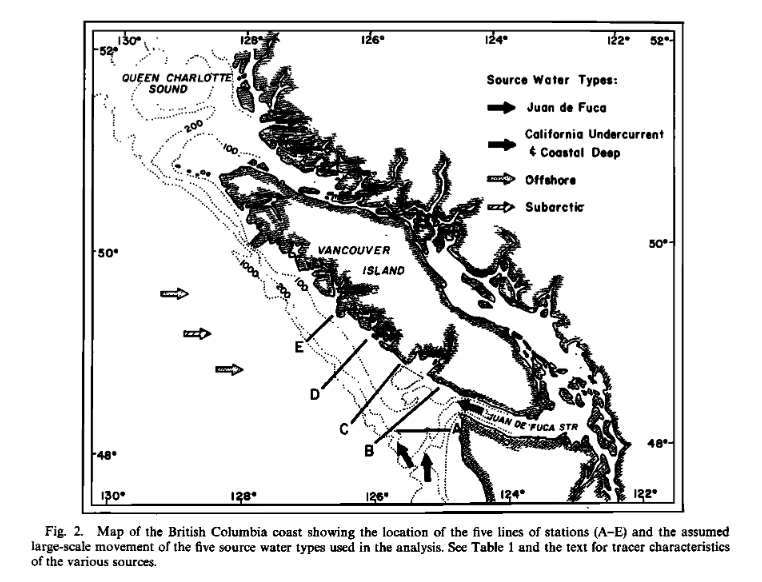

In [32]:
from IPython.display import Image
Image(filename='/home/ssahu/saurav/meeting_notebooks/Mackas_water_masses.png')


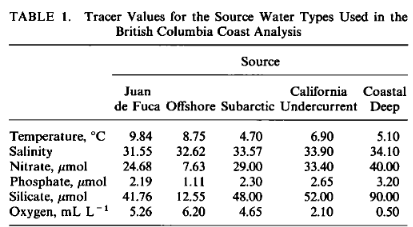

In [33]:
Image(filename='/home/ssahu/saurav/meeting_notebooks/Mackas_table.png')

In [35]:
oxy_off = 4.65
oxy_juan = 5.26
oxy_north = 6.20
oxy_cuc = 0.5
oxy_south = 1


oxy_eddy = (oxy_off*off_percent_low + oxy_juan*juan_percent_low + oxy_cuc*cuc_percent_low + \
oxy_south*south_percent_low + oxy_north*north_percent_low)/100

print(oxy_eddy)

1.87874


In [37]:
print("Using Mackas et al, 1987 oxygen concentrations and using our proportions of respective water masses we extimate it to be", oxy_eddy, "mL/L")

Using Mackas et al, 1987 oxygen concentrations and using our proportions of respective water masses we extimate it to be 1.87874 mL/L


### Using the Falkor CTD and Bottle data

In [13]:
import glob, os

file_name_ctd = []

for file in sorted(glob.glob('/data/ssahu/Falkor_2013/CTD/*.ctd')):
    if file != '/data/ssahu/Falkor_2013/CTD/wget_file_download_list.csv':
        file_name_ctd = np.append(arr=file_name_ctd, values=file)

In [14]:


file_name_che = []

for file in sorted(glob.glob('/data/ssahu/Falkor_2013/CTD/*.che')):
    if file != '/data/ssahu/Falkor_2013/CTD/wget_file_download_list.csv':
        file_name_che = np.append(arr=file_name_che, values=file)

In [15]:
# pd.read_table(file_name[1],delim_whitespace=1, skiprows=342)

In [16]:
file_name_ctd[2]

'/data/ssahu/Falkor_2013/CTD/2013-57-0004.ctd'

In [43]:
temp_array = []
sal_array = []
oxy_array = []


for file in file_name_ctd:
    ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=564, header=None)
    ctd_table.columns = ['Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Salinity',\
                         'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']
    temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
    sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
    oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))



In [44]:

for file in file_name_che:
        
    if file == '/data/ssahu/Falkor_2013/CTD/2013-57-0007.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=353, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'Salinity_Bottle','Flag_Bottle','O2_draw','O2_draw_n', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0011.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=375, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0012.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=359, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'Salinity_Bottle','Flag_Bottle','O2_draw','O2_draw_n', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0013.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=354, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0015.che':
#         continue

        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0016.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=356, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'Salinity_Bottle','Flag_Bottle','O2_draw','O2_draw_n', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0018.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=344, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0020.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=350, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0021.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=341, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
    elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0022.che':
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=339, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0023.che':
#         continue
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0024.che':
#         continue
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0027.che':
#         continue
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0029.che':
#         continue
        
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0035.che':
#         continue

        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0037.che':
#         continue

        
        
#     elif file == '/data/ssahu/Falkor_2013/CTD/2013-57-0040.che':
#         continue

        
    else:
        ctd_table = pd.read_table(file,delim_whitespace=1, skiprows=345, header=None)
        ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                             'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                            'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
        temp_array  = np.append(arr=temp_array, values=np.array(ctd_table['Temperature']))
        sal_array   = np.append(arr=sal_array,  values=np.array(ctd_table['Salinity']))
        oxy_array   = np.append(arr=oxy_array, values=np.array(ctd_table['O2 (dissolved)']))
        
    



ParserError: Error tokenizing data. C error: Expected 19 fields in line 349, saw 24


In [45]:
temp_array = temp_array[sal_array > 0]
oxy_array  = oxy_array[sal_array > 0]
sal_array  = sal_array[sal_array > 0]

In [46]:
temp_array = temp_array[oxy_array > 0]
sal_array  = sal_array[oxy_array > 0]
oxy_array  = oxy_array[oxy_array > 0]


In [47]:

sal_array  = sal_array[temp_array > 4]
oxy_array  = oxy_array[temp_array > 4]
temp_array = temp_array[temp_array > 4]


In [48]:
traj_tem_init = traj_tem_init[traj_sal_init > 30]
traj_sal_init = traj_sal_init[traj_sal_init > 30]

In [28]:
oxygen = plt.cm.rainbow(oxy_array, 10)

(30, 34.4205668258667)

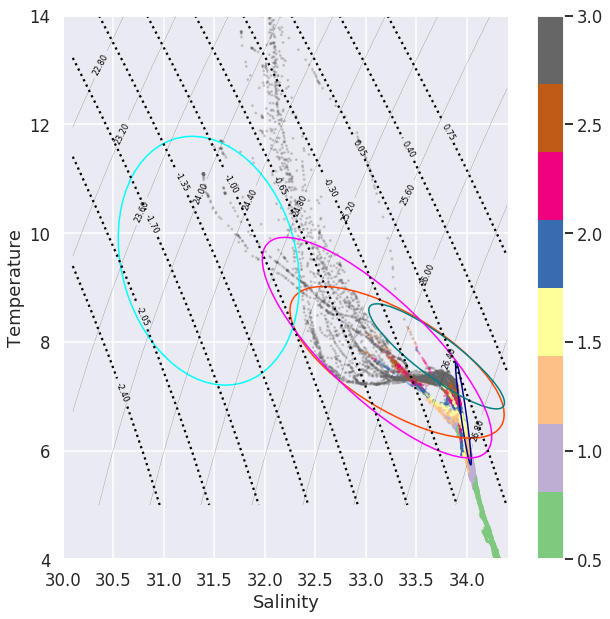

In [97]:
df =pd.DataFrame()
df['Temperature'] = temp_array
df['Salinity']    = sal_array
df['Oxygen']      = oxy_array

cmin = 0.5
cmax = 3

cmap = plt.get_cmap('Accent')


smin = 30
smax = np.nanmax(traj_sal_last)  + (0.01 * np.nanmax(traj_sal_last))
# tmin = np.nanmin(traj_tem_last) - (0.1 * np.nanmax(traj_tem_last))
tmin = 4
tmax = 14
# tmax = np.nanmax(traj_tem_last) + (0.1 * np.nanmax(traj_tem_last))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(traj_lon), np.mean(traj_lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000;
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = ax.contour(si,ti,dens_1, np.arange(22.4,27,0.4), linestyles='dashed', linewidths = 0.2,colors='k')
CS1 = ax.contour(si,ti,spic_1,np.arange(-2.4,1,0.35), linestyles='dotted', colors='k')
plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level


s = df.plot.scatter(x="Salinity", y="Temperature", c = "Oxygen", s = 2, ax = ax, cmap = cmap, vmin = cmin, \
                    vmax = cmax, alpha = 0.25, colorbar = False)
m = cm.ScalarMappable(cmap=cmap)
m.set_array(df['Oxygen'])

#     m.set_clim(-0.2, -0.05)
m.set_clim(cmin, cmax)
plt.colorbar(m)

# im = plt.gca().get_children()[0]
# cax = fig1.add_axes([0.65,0.1,0.025,0.8]) 
# cbar = fig1.colorbar(im, cax=cax)
# cbar.set_label("Depth (m)")



sal_mean_cuc = np.mean(traj_sal_final_cuc)
tem_mean_cuc = np.mean(traj_tem_final_cuc)
cov_cuc = np.cov(traj_sal_final_cuc, traj_tem_final_cuc)
cuc_ell = get_cov_ellipse(cov_cuc, (sal_mean_cuc, tem_mean_cuc), 2,
                    ec='darkblue', fc = None)
cuc_ell.set_facecolor('none')
ax.add_artist(cuc_ell)


sal_mean_off = np.mean(traj_sal_final_off)
tem_mean_off = np.mean(traj_tem_final_off)
cov_off = np.cov(traj_sal_final_off, traj_tem_final_off)
off_ell = get_cov_ellipse(cov_off, (sal_mean_off, tem_mean_off), 2,
                    ec='orangered', fc = None)
off_ell.set_facecolor('none')
ax.add_artist(off_ell)


traj_tem_final_north = traj_tem_final_north[traj_sal_final_north > 30]
traj_sal_final_north = traj_sal_final_north[traj_sal_final_north > 30]

sal_mean_south = np.mean(traj_sal_final_south)
tem_mean_south = np.mean(traj_tem_final_south)
cov_south = np.cov(traj_sal_final_south, traj_tem_final_south)
south_ell = get_cov_ellipse(cov_south, (sal_mean_south, tem_mean_south), 3,
                    ec='Teal', fc = None)
south_ell.set_facecolor('none')
ax.add_artist(south_ell)


sal_mean_juan = np.mean(traj_sal_final_juan)
tem_mean_juan = np.mean(traj_tem_final_juan)
cov_juan = np.cov(traj_sal_final_juan, traj_tem_final_juan)
juan_ell = get_cov_ellipse(cov_juan, (sal_mean_juan, tem_mean_juan), 2,
                    fc = None, ec='cyan')
juan_ell.set_facecolor('none')
ax.add_artist(juan_ell)


sal_mean_north = np.mean(traj_sal_final_north)
tem_mean_north = np.mean(traj_tem_final_north)
cov_north = np.cov(traj_sal_final_north, traj_tem_final_north)
north_ell = get_cov_ellipse(cov_north, (sal_mean_north, tem_mean_north), 2,
                    ec='Magenta', fc = None)
north_ell.set_facecolor('none')
ax.add_artist(north_ell)



sal_mean_init = np.mean(traj_sal_init)
tem_mean_init = np.mean(traj_tem_init)
cov_init = np.cov(traj_sal_init, traj_tem_init)
init_ell = get_cov_ellipse(cov_init, (sal_mean_init, tem_mean_init), 2,
                    ec='k', fc = None)
init_ell.set_facecolor('none')
ax.add_artist(init_ell)

ax.set_ylim(top=14, bottom = tmin)
ax.set_xlim(left = 30, right = smax)

In [24]:
sns.set_context('talk')

(30, 34.4205668258667)

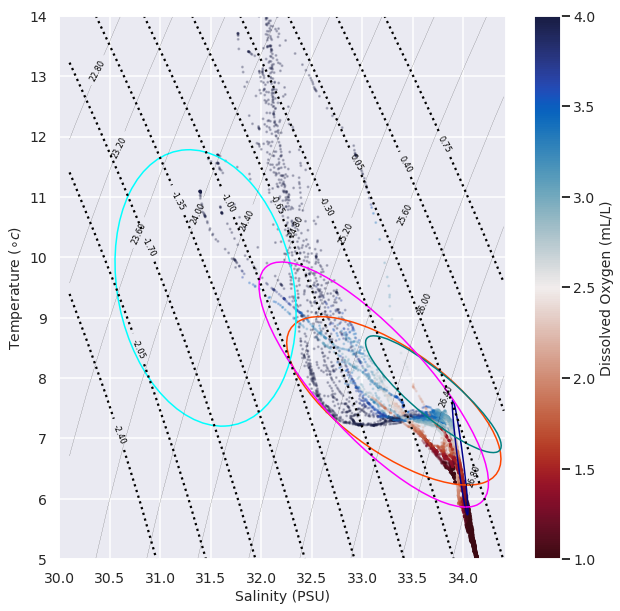

In [49]:
df =pd.DataFrame()
df['Temperature ($\circ c$)'] = temp_array
df['Salinity (PSU)']    = sal_array
df['Oxygen']      = oxy_array

cmin = 1
cmax = 4

# cmap = plt.get_cmap('Accent')

cmap = cmo.cm.balance_r


smin = 30
smax = np.nanmax(traj_sal_last)  + (0.01 * np.nanmax(traj_sal_last))
# tmin = np.nanmin(traj_tem_last) - (0.1 * np.nanmax(traj_tem_last))
tmin = 4
tmax = 14
# tmax = np.nanmax(traj_tem_last) + (0.1 * np.nanmax(traj_tem_last))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(traj_lon), np.mean(traj_lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000;
 
# Plot data ***********************************************
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
CS = ax.contour(si,ti,dens_1, np.arange(22.4,27,0.4), linestyles='dashed', linewidths = 0.2,colors='k')
CS1 = ax.contour(si,ti,spic_1,np.arange(-2.4,1,0.35), linestyles='dotted', colors='k')
plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level


s = df.plot.scatter(x="Salinity (PSU)", y="Temperature ($\circ c$)", c = "Oxygen", s = 2, ax = ax, cmap = cmap, vmin = cmin, \
                    vmax = cmax, alpha = 0.25, colorbar = False)
m = cm.ScalarMappable(cmap=cmap)
m.set_array(df['Oxygen'])

#     m.set_clim(-0.2, -0.05)
m.set_clim(cmin, cmax)
cbar = plt.colorbar(m)
cbar.set_label('Dissolved Oxygen (mL/L)', fontsize = 14)
cbar.ax.tick_params(labelsize=14)

ax.set_xlabel("Salinity (PSU)", fontsize = 14 )
ax.set_ylabel("Temperature ($\circ c$)", fontsize = 14 )

ax.tick_params(axis='both',labelsize =14)

# im = plt.gca().get_children()[0]
# cax = fig1.add_axes([0.65,0.1,0.025,0.8]) 
# cbar = fig1.colorbar(im, cax=cax)
# cbar.set_label("Depth (m)")



sal_mean_cuc = np.mean(traj_sal_final_cuc)
tem_mean_cuc = np.mean(traj_tem_final_cuc)
cov_cuc = np.cov(traj_sal_final_cuc, traj_tem_final_cuc)
cuc_ell = get_cov_ellipse(cov_cuc, (sal_mean_cuc, tem_mean_cuc), 2,
                    ec='darkblue', fc = None)
cuc_ell.set_facecolor('none')
ax.add_artist(cuc_ell)


sal_mean_off = np.mean(traj_sal_final_off)
tem_mean_off = np.mean(traj_tem_final_off)
cov_off = np.cov(traj_sal_final_off, traj_tem_final_off)
off_ell = get_cov_ellipse(cov_off, (sal_mean_off, tem_mean_off), 2,
                    ec='orangered', fc = None)
off_ell.set_facecolor('none')
ax.add_artist(off_ell)


traj_tem_final_north = traj_tem_final_north[traj_sal_final_north > 30]
traj_sal_final_north = traj_sal_final_north[traj_sal_final_north > 30]

sal_mean_south = np.mean(traj_sal_final_south)
tem_mean_south = np.mean(traj_tem_final_south)
cov_south = np.cov(traj_sal_final_south, traj_tem_final_south)
south_ell = get_cov_ellipse(cov_south, (sal_mean_south, tem_mean_south), 3,
                    ec='Teal', fc = None)
south_ell.set_facecolor('none')
ax.add_artist(south_ell)


sal_mean_juan = np.mean(traj_sal_final_juan)
tem_mean_juan = np.mean(traj_tem_final_juan)
cov_juan = np.cov(traj_sal_final_juan, traj_tem_final_juan)
juan_ell = get_cov_ellipse(cov_juan, (sal_mean_juan, tem_mean_juan), 2,
                    fc = None, ec='cyan')
juan_ell.set_facecolor('none')
ax.add_artist(juan_ell)


sal_mean_north = np.mean(traj_sal_final_north)
tem_mean_north = np.mean(traj_tem_final_north)
cov_north = np.cov(traj_sal_final_north, traj_tem_final_north)
north_ell = get_cov_ellipse(cov_north, (sal_mean_north, tem_mean_north), 2,
                    ec='Magenta', fc = None)
north_ell.set_facecolor('none')
ax.add_artist(north_ell)



# sal_mean_init = np.mean(traj_sal_init)
# tem_mean_init = np.mean(traj_tem_init)
# cov_init = np.cov(traj_sal_init, traj_tem_init)
# init_ell = get_cov_ellipse(cov_init, (sal_mean_init, tem_mean_init), 2,
#                     ec='k', fc = None)
# init_ell.set_facecolor('none')
# ax.add_artist(init_ell)

ax.set_ylim(top=14, bottom = 5)
ax.set_xlim(left = 30, right = smax)

In [48]:
oxy_off = 3.65
oxy_juan = 5.26
oxy_north = 4.20
oxy_cuc = 0.5
oxy_south = 2


oxy_eddy = (oxy_off*off_percent_low + oxy_juan*juan_percent_low + oxy_cuc*cuc_percent_low + \
oxy_south*south_percent_low + oxy_north*north_percent_low)/100

print(oxy_eddy)

1.78574


In [144]:
np.mean(final_age_days)/24

116.89654148728141

In [145]:
print("Visual inspection Oxygen Utilization Rate is:",oxy_eddy/(np.mean(final_age_days)/24),"mL/L per day")

Visual inspection Oxygen Utilization Rate is: 0.0152762432257 mL/L per day


In [27]:
sal_mean_juan = np.mean(traj_sal_final_juan)
tem_mean_juan = np.mean(traj_tem_final_juan)
cov_juan = np.cov(traj_sal_final_juan, traj_tem_final_juan)
juan_ell = get_cov_ellipse(cov_juan, (sal_mean_juan, tem_mean_juan), 2)

x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_juan_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if juan_ell.contains_point(points[i], radius=0) == True:
        
        ind_juan_oxy = np.append(arr=ind_juan_oxy, values=i.astype(int))
        
        
    

In [28]:
oxy_juan = np.mean(oxy_array[ind_juan_oxy.astype(int)])

print(oxy_juan)

4.85873015873


In [29]:
sal_mean_cuc = np.mean(traj_sal_final_cuc)
tem_mean_cuc = np.mean(traj_tem_final_cuc)
cov_cuc = np.cov(traj_sal_final_cuc, traj_tem_final_cuc)
cuc_ell = get_cov_ellipse(cov_cuc, (sal_mean_cuc, tem_mean_cuc), 2)

x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_cuc_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if cuc_ell.contains_point(points[i], radius=0) == True:
        
        ind_cuc_oxy = np.append(arr=ind_cuc_oxy, values=i.astype(int))
        
        

In [30]:
oxy_cuc = np.mean(oxy_array[ind_cuc_oxy.astype(int)])

print(oxy_cuc)

1.43543512246


In [31]:
sal_mean_off = np.mean(traj_sal_final_off)
tem_mean_off = np.mean(traj_tem_final_off)
cov_off = np.cov(traj_sal_final_off, traj_tem_final_off)
off_ell = get_cov_ellipse(cov_off, (sal_mean_off, tem_mean_off), 2)

x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_off_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if off_ell.contains_point(points[i], radius=0) == True:
        
        ind_off_oxy = np.append(arr=ind_off_oxy, values=i.astype(int))
        
        

In [32]:
oxy_off = np.mean(oxy_array[ind_off_oxy.astype(int)])

print(oxy_off)

2.44603296852


In [33]:

traj_tem_final_north = traj_tem_final_north[traj_sal_final_north > 30]
traj_sal_final_north = traj_sal_final_north[traj_sal_final_north > 30]


sal_mean_north = np.mean(traj_sal_final_north)
tem_mean_north = np.mean(traj_tem_final_north)
cov_north = np.cov(traj_sal_final_north, traj_tem_final_north)
north_ell = get_cov_ellipse(cov_north, (sal_mean_north, tem_mean_north), 2)


x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_north_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if north_ell.contains_point(points[i], radius=0) == True:
        
        ind_north_oxy = np.append(arr=ind_north_oxy, values=i.astype(int))
        
        

In [34]:
oxy_north = np.mean(oxy_array[ind_north_oxy.astype(int)])

print(oxy_north)

2.37913444691


In [35]:
sal_mean_south = np.mean(traj_sal_final_south)
tem_mean_south = np.mean(traj_tem_final_south)
cov_south = np.cov(traj_sal_final_south, traj_tem_final_south)
south_ell = get_cov_ellipse(cov_south, (sal_mean_south, tem_mean_south), 3)

x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_south_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if south_ell.contains_point(points[i], radius=0) == True:
        
        ind_south_oxy = np.append(arr=ind_south_oxy, values=i.astype(int))
        

In [36]:
oxy_south = np.mean(oxy_array[ind_south_oxy.astype(int)])

print(oxy_south)

3.00056022409


In [37]:
oxy_eddy = (oxy_off*off_percent_low + oxy_juan*juan_percent_low + oxy_cuc*cuc_percent_low + \
oxy_south*south_percent_low + oxy_north*north_percent_low)/100

print(oxy_eddy)

2.04178437216


In [38]:
traj_tem_final_local = traj_tem_final_local[traj_sal_final_local > 30]
traj_sal_final_local = traj_sal_final_local[traj_sal_final_local > 30]

sal_mean_local = np.mean(traj_sal_final_local)
tem_mean_local = np.mean(traj_tem_final_local)
cov_local = np.cov(traj_sal_final_local, traj_tem_final_local)
local_ell = get_cov_ellipse(cov_local, (sal_mean_local, tem_mean_local), 3)

x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_local_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if local_ell.contains_point(points[i], radius=0) == True:
        
        ind_local_oxy = np.append(arr=ind_local_oxy, values=i.astype(int))
        

In [39]:
oxy_local = np.mean(oxy_array[ind_local_oxy.astype(int)])

print(oxy_local)

2.16113728196


In [73]:
oxy_eddy = (oxy_off*off_percent_low + oxy_juan*juan_percent_low + oxy_cuc*cuc_percent_low + \
oxy_south*south_percent_low + oxy_north*north_percent_low + oxy_local*6.5)/100

print(oxy_eddy)

2.18225829549


In [41]:
sal_mean_init = np.mean(traj_sal_init)
tem_mean_init = np.mean(traj_tem_init)
cov_init = np.cov(traj_sal_init, traj_tem_init)
init_ell = get_cov_ellipse(cov_init, (sal_mean_init, tem_mean_init), 3)

x, y = sal_array.flatten(), temp_array.flatten()
points = np.vstack((x,y)).T

ind_init_oxy = []

for i in np.arange(temp_array.shape[0]):
    
    if init_ell.contains_point(points[i], radius=0) == True:
        
        ind_init_oxy = np.append(arr=ind_init_oxy, values=i.astype(int))
        

In [42]:
oxy_init = np.mean(oxy_array[ind_init_oxy.astype(int)])

print(oxy_init)

2.91736842105


In [26]:
np.mean(final_age_days)/24

116.89654148728141

In [52]:
temp_LB08 = []
sal_LB08  = []
oxy_LB08  = []




ctd_file_LB_08 = '/data/ssahu/Falkor_2013/CTD/2013-57-0003.ctd'

ctd_table = pd.read_table(ctd_file_LB_08,delim_whitespace=1, skiprows=564, header=None)
ctd_table.columns = ['Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Salinity',\
                     'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']
temp_LB08  = np.append(arr=temp_LB08, values=np.array(ctd_table['Temperature']))
sal_LB08   = np.append(arr=sal_LB08,  values=np.array(ctd_table['Salinity']))
oxy_LB08   = np.append(arr=oxy_LB08, values=np.array(ctd_table['O2 (dissolved)']))

che_file_LB_08 = '/data/ssahu/Falkor_2013/CTD/2013-57-0003.che'


ctd_table = pd.read_table(che_file_LB_08,delim_whitespace=1, skiprows=345, header=None)
ctd_table.columns = ['Bottle_number_1', 'Bottle_number_2','Pressure', 'Temperature','Transmissivity' ,'Fluorescence','Turbidity','Salinity',\
                     'O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records', 'Sample numbers', \
                    'Temp draw', 'O2_draw', 'Flag', 'Nitrate', 'Flag_N', 'Silicate', 'Flag_S', 'Phosphate', "Flag_P"]
temp_LB08  = np.append(arr=temp_LB08, values=np.array(ctd_table['Temperature']))
sal_LB08  = np.append(arr=sal_LB08,  values=np.array(ctd_table['Salinity']))
oxy_LB08   = np.append(arr=oxy_LB08, values=np.array(ctd_table['O2 (dissolved)']))

In [59]:
SA_LB08  = np.empty_like(temp_LB08)
CT_LB08  = np.empty_like(temp_LB08)
rho_LB08 = np.empty_like(temp_LB08)

for i in np.arange(temp_LB08.shape[0]):

    SA_LB08[i] = gsw.SA_from_SP(sal_LB08[i], 0, np.mean(lon), np.mean(lat))

    CT_LB08[i] = gsw.CT_from_pt(sal_LB08[i], temp_LB08[i])

    rho_LB08[i]=gsw.rho(SA_LB08[i],CT_LB08[i],0) - 1000


In [66]:
rho_select_LB08 = rho_LB08[(rho_LB08 >26.3) & (rho_LB08 < 26.5)]
oxy_select_LB08 = oxy_LB08[(rho_LB08 >26.3) & (rho_LB08 < 26.5)]

In [68]:
np.mean(oxy_select_LB08)

1.4466666666666665

In [69]:
print("Oxygen Utilization Rate is:",(oxy_eddy-np.mean(oxy_select_LB08))/(np.mean(final_age_days/24)),"mL/L per day")

Oxygen Utilization Rate is: 0.00629267230207 mL/L per day


In [70]:
print("Oxygen Utilization Rate is:",(oxy_eddy-np.mean(oxy_select_LB08))/(np.mean(final_age_days/(24*365))),"mL/L per year")

Oxygen Utilization Rate is: 2.29682539026 mL/L per year


In [71]:
print("Converting to Oxygen Utilization Rate is:",((oxy_eddy-np.mean(oxy_select_LB08))/(np.mean(final_age_days/(24*365))))*(44.61/1000),"mmol per cubic m per year")

Converting to Oxygen Utilization Rate is: 0.102461380659 mmol per cubic m per year


116.8965414872814

In [59]:
juan_ell.contains_point([31.5, 10], radius=0)

True